In [1]:
import pandas as pd

In [2]:
# from datasets import load_dataset , list_datasets
# datasets_list = list_datasets()
# datasets_list

In [3]:
from datasets import load_dataset , list_datasets
datasets = load_dataset('stochastic/random_streetview_images_pano_v0.0.2')
datasets

Found cached dataset parquet (/Users/ramamurthi/.cache/huggingface/datasets/stochastic___parquet/stochastic--random_streetview_images_pano_v0.0.2-65d25597b51c2d04/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'country_iso_alpha2', 'latitude', 'longitude', 'address'],
        num_rows: 11054
    })
})

In [4]:
train_data = datasets['train']
train_data

Dataset({
    features: ['image', 'country_iso_alpha2', 'latitude', 'longitude', 'address'],
    num_rows: 11054
})

In [5]:
len(train_data)

11054

In [6]:
train_data[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3030x561>,
 'country_iso_alpha2': 'SK',
 'latitude': '48.3710587',
 'longitude': '19.416553',
 'address': '050103, Šuľa, Slovakia'}

In [9]:
type(train_data[1]['image'])

PIL.JpegImagePlugin.JpegImageFile

In [18]:
import torch
from torchvision.transforms import ToTensor , Lambda
img = train_data[1]['image']
pil_to_tensor = ToTensor()(img)
print(pil_to_tensor.shape) 


torch.Size([3, 561, 3030])


In [24]:
train_data.features

{'image': Image(decode=True, id=None),
 'country_iso_alpha2': Value(dtype='string', id=None),
 'latitude': Value(dtype='string', id=None),
 'longitude': Value(dtype='string', id=None),
 'address': Value(dtype='string', id=None)}

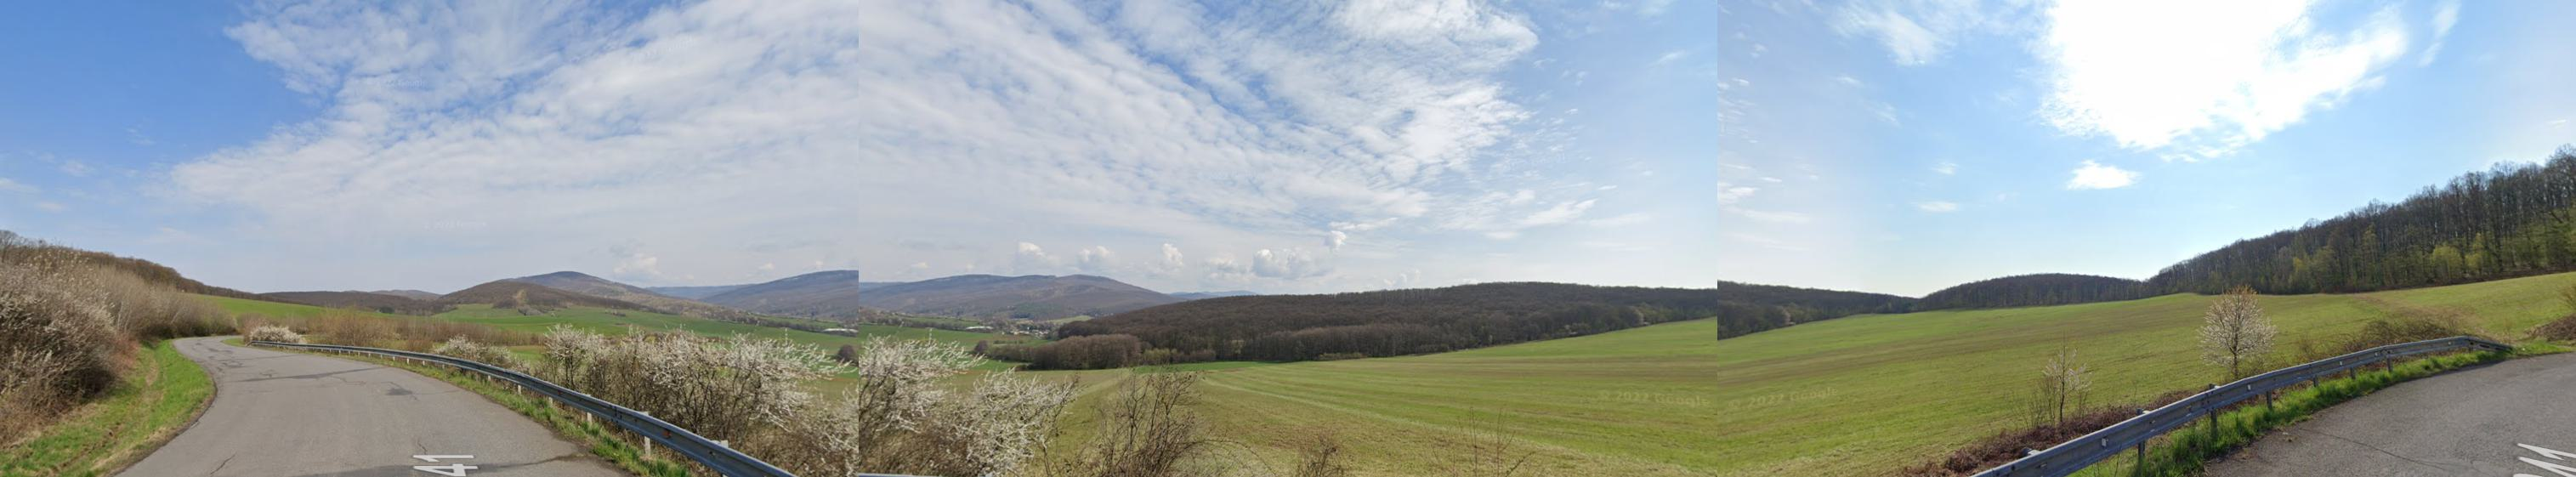

In [20]:
train_data[1]['image']

In [21]:
pil_to_tensor

tensor([[[0.3725, 0.3725, 0.3725,  ..., 0.7098, 0.7098, 0.7098],
         [0.3725, 0.3725, 0.3725,  ..., 0.7098, 0.7098, 0.7098],
         [0.3725, 0.3725, 0.3725,  ..., 0.7098, 0.7098, 0.7098],
         ...,
         [0.5098, 0.5098, 0.4863,  ..., 0.5020, 0.4588, 0.4549],
         [0.4980, 0.4784, 0.4353,  ..., 0.8000, 0.7412, 0.6588],
         [0.4275, 0.4392, 0.3882,  ..., 0.8118, 0.8000, 0.7882]],

        [[0.5608, 0.5608, 0.5608,  ..., 0.8157, 0.8157, 0.8157],
         [0.5608, 0.5608, 0.5608,  ..., 0.8157, 0.8157, 0.8157],
         [0.5608, 0.5608, 0.5608,  ..., 0.8157, 0.8157, 0.8157],
         ...,
         [0.4784, 0.4863, 0.4824,  ..., 0.4863, 0.4431, 0.4392],
         [0.4902, 0.4784, 0.4549,  ..., 0.7843, 0.7255, 0.6431],
         [0.4627, 0.4784, 0.4314,  ..., 0.8078, 0.7961, 0.7843]],

        [[0.8196, 0.8196, 0.8196,  ..., 0.9333, 0.9333, 0.9333],
         [0.8196, 0.8196, 0.8196,  ..., 0.9333, 0.9333, 0.9333],
         [0.8196, 0.8196, 0.8196,  ..., 0.9333, 0.9333, 0.

In [37]:
classes_to_idx = {j:i for i,j in enumerate(set(train_data['country_iso_alpha2']))}
classes_to_idx


{'LV': 0,
 'PT': 1,
 'UA': 2,
 'HR': 3,
 'NL': 4,
 'DE': 5,
 'KH': 6,
 'IT': 7,
 'IE': 8,
 'CH': 9,
 'CL': 10,
 'MY': 11,
 'NO': 12,
 'US': 13,
 'JP': 14,
 'SE': 15,
 'PE': 16,
 'IL': 17,
 'RO': 18,
 'NZ': 19,
 'CA': 20,
 'BT': 21,
 'DK': 22,
 'BG': 23,
 'MX': 24,
 'HK': 25,
 'AU': 26,
 'GR': 27,
 'FR': 28,
 'TH': 29,
 'SG': 30,
 'BW': 31,
 'FI': 32,
 'ES': 33,
 'AD': 34,
 'LT': 35,
 'BE': 36,
 'KR': 37,
 'SI': 38,
 'HU': 39,
 'RU': 40,
 'ID': 41,
 'EE': 42,
 'SK': 43,
 'PL': 44,
 'GB': 45,
 'AR': 46,
 'CO': 47,
 'TW': 48,
 'BD': 49,
 'ZA': 50,
 'SZ': 51,
 'BR': 52,
 'CZ': 53,
 'AE': 54,
 'IS': 55}

In [38]:
idx = 2
classes_to_idx[train_data[idx]['country_iso_alpha2']]

43

In [ ]:
import numpy as np
pix = np.array(train_data[6]['image'])
pix.shape

In [65]:
import torch
from torch.utils.data import Dataset
# from torchvision import datasets
from torchvision.transforms import ToTensor , Lambda

class GeoGuessrDataset(Dataset):
    def __init__(self, ds, label_name, transform=None, target_transform=None):
        
        self.ds = ds
        self.label_name = label_name
        self.transform = transform
        self.target_transform = target_transform
        self.targets = ds[label_name]
        
        # img_path = os.path.join(self.img_dir, self.img_filename)
        # self.img_df = pd.read_csv(img_path)

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        
        image = self.ds[idx]['image']
        label = self.ds[idx][self.label_name]
        
        if self.transform:
            image = self.transform(image)        
        
            
        if self.target_transform:
            label = self.target_transform(label)
        
        # Changing label to int using label mapper
        label = classes_to_idx[label]
        return image, label
        
        
        

In [66]:
from torchvision import transforms

transforms = transforms.Compose( [transforms.ToTensor()])

geoguesser_dataset = GeoGuessrDataset(ds = train_data, label_name = 'country_iso_alpha2' , transform = transforms)
print(geoguesser_dataset[6][1])
geoguesser_dataset[6][0].shape 

14


torch.Size([3, 561, 3030])

In [60]:
geoguesser_dataset.targets

['SK',
 'SK',
 'SK',
 'SK',
 'SK',
 'HK',
 'JP',
 'GB',
 'HK',
 'IE',
 'FR',
 'HK',
 'CA',
 'BG',
 'GB',
 'SG',
 'NZ',
 'KR',
 'NZ',
 'KR',
 'SI',
 'BD',
 'CA',
 'KR',
 'GB',
 'IE',
 'PE',
 'SG',
 'US',
 'AU',
 'AU',
 'SG',
 'ZA',
 'AU',
 'PE',
 'ZA',
 'LT',
 'GB',
 'NZ',
 'HK',
 'KR',
 'FI',
 'GB',
 'KH',
 'US',
 'CA',
 'FI',
 'PE',
 'SK',
 'SG',
 'LT',
 'FI',
 'FI',
 'AU',
 'KR',
 'FI',
 'FR',
 'FI',
 'FI',
 'CA',
 'FI',
 'CA',
 'SE',
 'SG',
 'HK',
 'KR',
 'FI',
 'FR',
 'FI',
 'US',
 'AU',
 'SK',
 'LT',
 'NZ',
 'LT',
 'MY',
 'AU',
 'NZ',
 'FR',
 'AU',
 'CA',
 'LT',
 'LT',
 'LT',
 'US',
 'FI',
 'SI',
 'PE',
 'PE',
 'ZA',
 'FR',
 'HK',
 'MY',
 'BG',
 'AU',
 'HU',
 'HK',
 'BG',
 'KR',
 'SI',
 'NZ',
 'BG',
 'NZ',
 'CH',
 'US',
 'SI',
 'NZ',
 'KR',
 'KR',
 'ZA',
 'HU',
 'AU',
 'CO',
 'AU',
 'KR',
 'FR',
 'LT',
 'HU',
 'GB',
 'US',
 'AU',
 'KR',
 'HK',
 'GB',
 'KR',
 'HU',
 'GB',
 'HK',
 'SG',
 'FR',
 'HK',
 'KR',
 'MY',
 'HU',
 'CA',
 'KR',
 'HU',
 'MY',
 'HK',
 'KR',
 'SI',
 'IL',
 'HK',

In [67]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split


In [72]:
TEST_SIZE = 0.2
BATCH_SIZE = 64
SEED = 42


train_indices, test_indices, _, _ = train_test_split(
range(len(geoguesser_dataset)),
geoguesser_dataset.targets,
stratify=geoguesser_dataset.targets,
test_size=TEST_SIZE,
random_state=SEED
)



In [73]:

# generate subset based on indices
train_split = Subset(geoguesser_dataset, train_indices)
test_split = Subset(geoguesser_dataset, test_indices)

# create batches
train_dl = DataLoader(train_split, batch_size=BATCH_SIZE, shuffle=True)
test_dl = DataLoader(test_split, batch_size=BATCH_SIZE)




In [74]:
len(train_dl) , len(test_dl)


(139, 35)

In [71]:
(156+18)*64

11136

In [75]:
from torchvision import models

dir(models)


['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'